In [1]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
from input import CoILDataset
from tqdm import tqdm
import pprint
from ipywidgets import interact
import numpy as n
from scipy.misc import imread
pp = pprint.PrettyPrinter(indent=2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset = CoILDataset('/mnt/parallel/CARLA/CARLA100/', None)

 Episodes list 
Episode  /mnt/parallel/CARLA/CARLA100/episode_00648
Episode  /mnt/parallel/CARLA/CARLA100/episode_01609
Episode  /mnt/parallel/CARLA/CARLA100/episode_01044
Episode  /mnt/parallel/CARLA/CARLA100/episode_00084
Episode  /mnt/parallel/CARLA/CARLA100/episode_01613
Episode  /mnt/parallel/CARLA/CARLA100/episode_00400
Episode  /mnt/parallel/CARLA/CARLA100/episode_01125
Episode  /mnt/parallel/CARLA/CARLA100/episode_01682
Episode  /mnt/parallel/CARLA/CARLA100/episode_01770
Episode  /mnt/parallel/CARLA/CARLA100/episode_01459
Episode  /mnt/parallel/CARLA/CARLA100/episode_00420
Episode  /mnt/parallel/CARLA/CARLA100/episode_00572
Episode  /mnt/parallel/CARLA/CARLA100/episode_01378
Episode  /mnt/parallel/CARLA/CARLA100/episode_00820
Episode  /mnt/parallel/CARLA/CARLA100/episode_00886
Episode  /mnt/parallel/CARLA/CARLA100/episode_01762
Episode  /mnt/parallel/CARLA/CARLA100/episode_00006
Episode  /mnt/parallel/CARLA/CARLA100/episode_00802
Episode  /mnt/parallel/CARLA/CARLA100/episode_01

Episode  /mnt/parallel/CARLA/CARLA100/episode_01362
Episode  /mnt/parallel/CARLA/CARLA100/episode_01523
Episode  /mnt/parallel/CARLA/CARLA100/episode_00421
Episode  /mnt/parallel/CARLA/CARLA100/episode_00483
Episode  /mnt/parallel/CARLA/CARLA100/episode_00653
Episode  /mnt/parallel/CARLA/CARLA100/episode_00247
Episode  /mnt/parallel/CARLA/CARLA100/episode_00813
Episode  /mnt/parallel/CARLA/CARLA100/episode_01850
THIS EP GOT A PROBLEM!
Episode  /mnt/parallel/CARLA/CARLA100/episode_01133
Episode  /mnt/parallel/CARLA/CARLA100/episode_00726
Episode  /mnt/parallel/CARLA/CARLA100/episode_01607
Episode  /mnt/parallel/CARLA/CARLA100/episode_01525
Episode  /mnt/parallel/CARLA/CARLA100/episode_01123
Episode  /mnt/parallel/CARLA/CARLA100/episode_01455
Episode  /mnt/parallel/CARLA/CARLA100/episode_01049
Episode  /mnt/parallel/CARLA/CARLA100/episode_01205
Episode  /mnt/parallel/CARLA/CARLA100/episode_00409
Episode  /mnt/parallel/CARLA/CARLA100/episode_00884
Episode  /mnt/parallel/CARLA/CARLA100/epi

Episode  /mnt/parallel/CARLA/CARLA100/episode_01134
Episode  /mnt/parallel/CARLA/CARLA100/episode_00970
Episode  /mnt/parallel/CARLA/CARLA100/episode_01203
THIS EP GOT A PROBLEM!
Episode  /mnt/parallel/CARLA/CARLA100/episode_01452
Episode  /mnt/parallel/CARLA/CARLA100/episode_01765
Episode  /mnt/parallel/CARLA/CARLA100/episode_01280
Episode  /mnt/parallel/CARLA/CARLA100/episode_01371
Episode  /mnt/parallel/CARLA/CARLA100/episode_01451
Episode  /mnt/parallel/CARLA/CARLA100/episode_01048
Episode  /mnt/parallel/CARLA/CARLA100/episode_00888
Episode  /mnt/parallel/CARLA/CARLA100/episode_00818
Episode  /mnt/parallel/CARLA/CARLA100/episode_00576
Episode  /mnt/parallel/CARLA/CARLA100/episode_00344
THIS EP GOT A PROBLEM!
Episode  /mnt/parallel/CARLA/CARLA100/episode_00722
Episode  /mnt/parallel/CARLA/CARLA100/episode_01363
Episode  /mnt/parallel/CARLA/CARLA100/episode_00089
Episode  /mnt/parallel/CARLA/CARLA100/episode_01139
Episode  /mnt/parallel/CARLA/CARLA100/episode_00328
THIS EP GOT A PROB

In [34]:
Steer = np.zeros(len(dataset.measurements))
Throttle = np.zeros(len(dataset.measurements))
Brake = np.zeros(len(dataset.measurements))
Speed_module = np.zeros(len(dataset.measurements))
Directions = np.zeros(len(dataset.measurements))

for i, M in tqdm(enumerate(dataset.measurements)):
    Steer[i] = M['steer']
    Throttle[i] = M['throttle']
    Brake[i] = M['brake']
    Speed_module[i] = M['speed_module']
    Directions[i] = M['directions']

1567704it [00:02, 702065.76it/s]


-0.1872551441192627 10.846786499023438


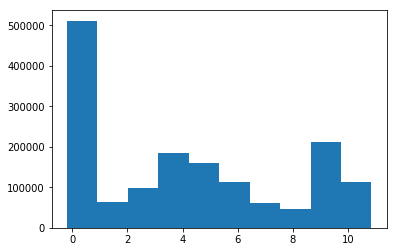

In [113]:
_ = plt.hist(Speed_module)
print(Speed_module.min(), Speed_module.max())

-1.0 1.0


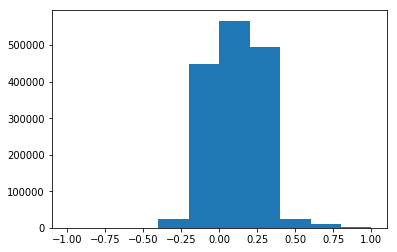

In [114]:
_ = plt.hist(Steer)
print(Steer.min(), Steer.max())

0.009999999776482582 0.75


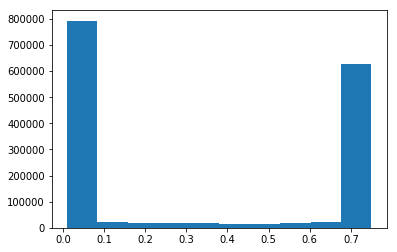

In [115]:
_ = plt.hist(Throttle)
print(Throttle.min(), Throttle.max())

0.0 1.0


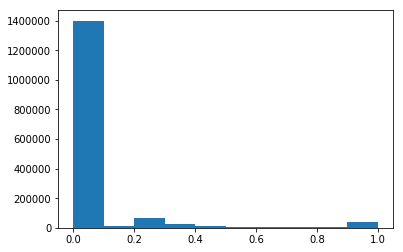

In [116]:
_ = plt.hist(Brake)
print(Brake.min(), Brake.max())

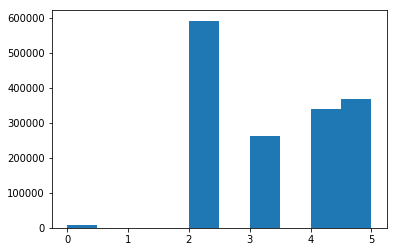

In [117]:
_ = plt.hist(Directions)

In [125]:
weird = np.where(Speed_module<0.)[0]

In [126]:
fig = figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

In [127]:
def make_image(index):
    idx = weird[index]
    img = dataset.sensor_data_names[idx]
    title(img)
    img = imread(img)
    imshow(img) 
    return fig

_ = interact(make_image, index=(0, weird.shape[0]-1))


interactive(children=(IntSlider(value=127190, description='index', max=254381), Output()), _dom_classes=('widg…

In [128]:
# define ranges
import sys
def full_split(dataset):
    
    S = np.zeros(len(dataset.measurements))
    T = np.zeros(len(dataset.measurements))
    B = np.zeros(len(dataset.measurements))
    V = np.zeros(len(dataset.measurements))
    C = np.zeros(len(dataset.measurements))

    for i, M in tqdm(enumerate(dataset.measurements)):
        S[i] = M['steer']
        T[i] = M['throttle']
        B[i] = M['brake']
        V[i] = M['speed_module']
        C[i] = M['directions']
    
    control = [[0, 2, 5], [3], [4]]
    steering = [-1.1, -0.9, -0.8, -0.6, 0, 0.6, 0.8, 0.9, 1.1]
    throttle = [0., 0.1, 0.3, 0.5, 1.1]
    brake = [0., 0.1, 0.3, 0.5, 1.1]
    speed = [-1., 2., 4., 6., 8., 11.]
    keys = list()
    
    counter = 0
    for c in range(3):  # control
        for s in range(len(steering)-1):  # steer
            for t in range(len(throttle)-1): # throttle
                for b in range(len(brake)-1): # brake
                    for v in range(len(speed)-1): # speed
                        true_c = [False, ] * C.shape[0]
                        for vals in control[c]:
                            true_c = np.logical_or(true_c, C==vals)
                        # true_c = [m in control[c] for m in M[D[b'control']]]
                        true_s = np.logical_and(S>=steering[s], S<steering[s+1])
                        true_t = np.logical_and(T>=throttle[t], T<throttle[t+1])
                        true_b = np.logical_and(B>=brake[b], B<brake[b+1])
                        true_v = np.logical_and(V>=speed[v], V<speed[v+1])
                        k1 = np.logical_and(true_c, true_s)
                        k2 = np.logical_and(true_t, true_b)
                        k3 = np.logical_and(k1, k2)
                        k = np.logical_and(k3, true_v)
                        k = np.where(k)[0]
                        counter += 1
                        # bar.next()
                        # sys.stdout.write("{} ".format(counter))
                        # sys.stdout.flush()
                        print("{} | speed: {} | control {} | throttle {} | brake {} | steer {}".format(
                            counter, sum(true_v), sum(true_c), sum(true_t), sum(true_b), sum(true_s)), end="\r")
                        # keys.append(k)
                        if len(k) > 0:
                            this_d = {'keys': k, 'control': c, 'steer': s, 'throttle': t, 'brake': b, 'speed': v}
                            keys.append(this_d)
                        # print(counter)
    # keys.append({'keys': list(np.arange(M.shape[1])), 'control': np.inf, 'steer': np.inf, 'throttle': np.inf, 'brake': np.inf, 'speed': np.inf})
    print('filter length: {}'.format(len(keys)))
    return keys
# bar.finish()

In [129]:
keys = full_split(dataset)

1567704it [00:01, 828539.00it/s]


filter length: 31679 | control 338664 | throttle 674178 | brake 54873 | steer 545426301


In [130]:
a = 0
for k in keys:
    a += len(k['keys'])
    
print(a)

1567704


In [105]:
true_s = np.logical_and(Steer>=.9, Steer<1)

In [106]:
sum(true_s)

27

In [89]:
Steer.shape[0]

1567704

In [131]:
print(len(keys))

316
